In [2]:
from sys import path
import os 
from extraction import extraction
from load import load
import math
from transformation import transformations

path.append(os.path.realpath("../"))

In [2]:
def extraction_api(path):
    return extraction.get_full_data(math.ceil(extraction.extract(path, 0)["total"]/100))

In [3]:
def transformation(dataframe):
    for i in range(len(dataframe)):
        if dataframe.loc[i, "properties.raw_email"] != None:
            dataframe.loc[i, "Email"] = transformations.exctract_email(dataframe.loc[i, "properties.raw_email"])[0]
            dataframe.loc[i, "Name"] = transformations.exctract_email(dataframe.loc[i, "properties.raw_email"])[1]
        else:
            dataframe.loc[i, "Email"] = ""
            dataframe.loc[i, "Name"] = ""
    dataframe = transformations.Delete_duplicates(dataframe)
    dataframe['Country'] = dataframe["properties.country"].apply(lambda x: transformations.findCountry(x)[0])
    dataframe['City'] = dataframe["properties.country"].apply(lambda x: transformations.findCountry(x)[1])
    dataframe = dataframe.replace("Éire / Ireland", "Ireland") 
    dataframe = transformations.get_phone_number(dataframe)
    return dataframe

In [4]:
if __name__ == '__main__':
    Hubspot_df = extraction_api("https://api.hubapi.com/crm/v3/objects/contacts/search")
    fina_df = transformation(Hubspot_df)
    fina_df.to_csv('resources/output.csv', index = False)

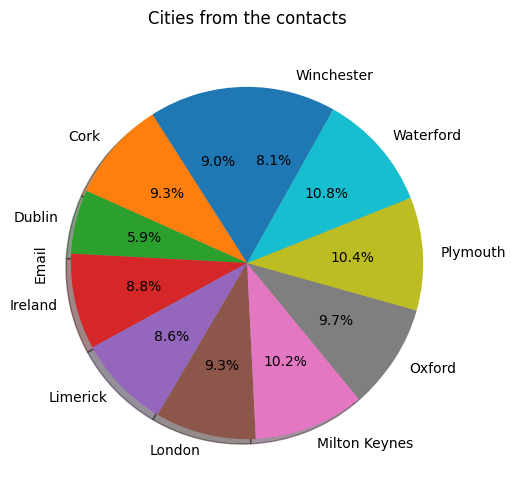

In [12]:
import matplotlib as mpl
import matplotlib.pyplot as plt
df_countries = fina_df.groupby('City', axis=0).count()
df_countries['Email'].plot(kind='pie',
figsize=(5, 6),
autopct='%1.1f%%', 
startangle=90, 
shadow=True,
)
plt.title('Cities from the contacts')
plt.axis('equal') 
plt.show()

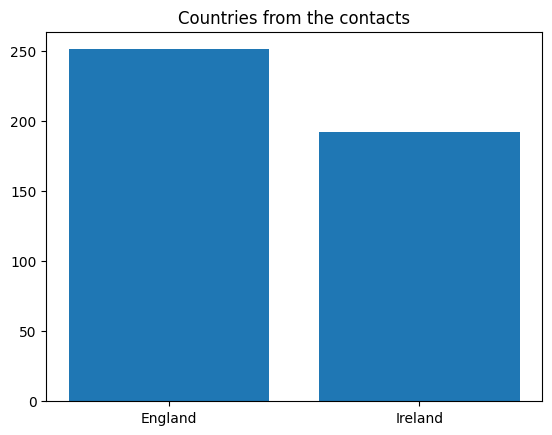

In [13]:
x_values = fina_df['Country'].unique()
y_values = fina_df['Country'].value_counts().tolist()
plt.bar(x_values, y_values)
plt.title('Countries from the contacts')
plt.show()
plt.close('all')